 # Lab 4.05 - Bivariate Analysis of Qualitative Data


In [122]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 5 - Survey of Australian Students

Load the data file data/survey.csv. It contains the result of a survey of students from an Australian university.

We want to investigate the relationship between some discrete (nominal or ordinal) variables in this dataset. For any pairs of variables listed below, follow these steps:

* First, think about what exactly you expect for the given combination of variables.
* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
- Looking at the chart, do you expect a rather high or rather low value for the $\chi^2$ statistic? Why?
* Run the $\chi^2$ test to determine whether there is a relationship between the two variables. Calculate the $\chi^2$ statistic, the critical limit $g$ and the $p$ value, each for significance level $\alpha = 0.05$.
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the $\chi^2$ test?


The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Read the dataset.

In [123]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/survey.csv', keep_default_na=False)
df.head()

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18,Right,R on L,92,Left,Some,Never,173,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.8,Imperial,17.583
2,3,Male,18,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
3,4,Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160,Metric,20.333
4,5,Male,20,20,Right,Neither,35,Right,Some,Never,165,Metric,23.667


What are the different values for Exer and Smoke?  
Change both variables to ordinal variables with a specific order.

In [124]:
df.Exer.value_counts()

Exer
Freq    115
Some     98
None     24
Name: count, dtype: int64

In [125]:
df.Smoke.value_counts()

Smoke
Never    189
Occas     19
Regul     17
Heavy     11
NA         1
Name: count, dtype: int64

In [126]:
exer_type=CategoricalDtype(categories=['None', 'Some', 'Freq'], ordered=True)
df.Exer = df.Exer.astype(exer_type)
smoke_type=CategoricalDtype(categories=['Never', 'Occas', 'Heavy', 'Regul'], ordered=True)
df.Smoke = df.Smoke.astype(smoke_type)

* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
* Looking at the chart, do you expect a rather high or rather low value for the  χ2  statistic? Why?
* Run the  χ2  test to determine whether there is a relationship between the two variables. Calculate the  χ2  statistic, the critical limit  g  and the  p  value, each for significance level  α=0.05 .
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the  χ2  test?

The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

In [127]:
observed = pd.crosstab(df.Exer, df.Smoke)
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Chi-squared       : 5.4885
Degrees of freedom: 6
P-value           : 0.4828


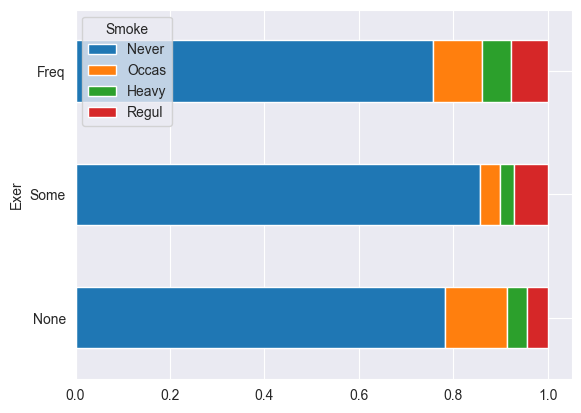

In [128]:
# Contingency table without the margins
observed_p = pd.crosstab(df.Exer, df.Smoke, normalize='index')

# Horizontally oriented stacked bar chart
observed_p.plot(kind='barh', stacked=True);

In [129]:
stats.contingency.association(observed, method='cramer')

0.10783448053343489

Exer/Smoke: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483

In [130]:
df["W.Hnd"].value_counts()

W.Hnd
Right    218
Left      18
NA         1
Name: count, dtype: int64

In [131]:
df["Fold"].value_counts()

Fold
R on L     120
L on R      99
Neither     18
Name: count, dtype: int64

In [132]:
fold_type=CategoricalDtype(categories=['R on L', 'L on R', 'Neither'], ordered=True)
df["Fold"] = df["Fold"].astype(fold_type)

In [133]:
observed = pd.crosstab(df["W.Hnd"], df.Fold)
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Chi-squared       : 2.9786
Degrees of freedom: 4
P-value           : 0.5614


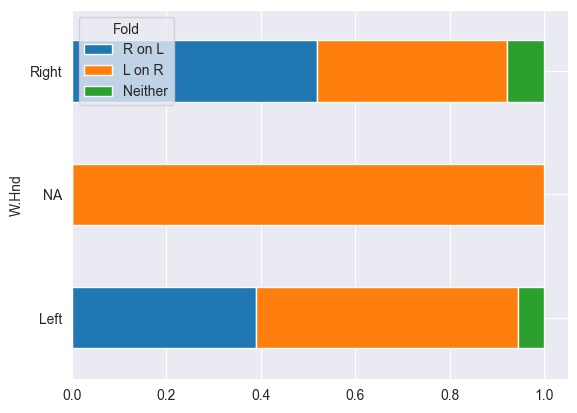

In [134]:
# Contingency table without the margins
observed_p = pd.crosstab(df["W.Hnd"], df.Fold, normalize='index')

# Horizontally oriented stacked bar chart
observed_p.plot(kind='barh', stacked=True);

In [135]:
stats.contingency.association(observed, method='cramer')

0.07927114594240209

W.Hnd/Fold: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454

In [136]:
df["Sex"].value_counts()
sex_type = CategoricalDtype(categories=['Male', 'Female'], ordered=True)
df["Sex"] = df["Sex"].astype(sex_type)

In [137]:
observed = pd.crosstab(df["Sex"], df.Smoke)
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Chi-squared       : 3.5536
Degrees of freedom: 3
P-value           : 0.3139


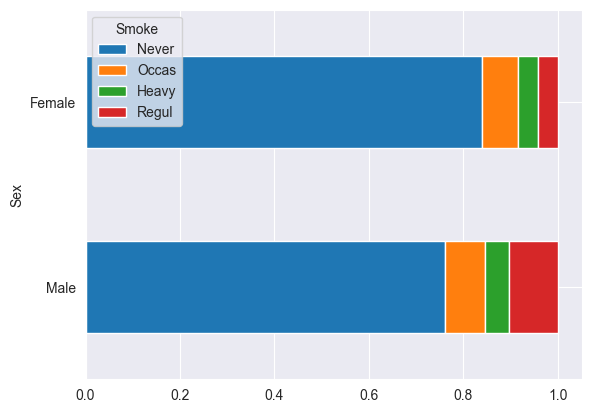

In [138]:
# Contingency table without the margins
observed_p = pd.crosstab(df["Sex"], df.Smoke, normalize='index')

# Horizontally oriented stacked bar chart
observed_p.plot(kind='barh', stacked=True);

In [139]:
stats.contingency.association(observed, method='cramer')

0.12297063364170784

Sex/Smoke: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314

In [140]:
observed = pd.crosstab(df["Sex"], df["W.Hnd"])
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Chi-squared       : 1.5478
Degrees of freedom: 2
P-value           : 0.4612


Sex/W.Hnd: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627